# 1. Import and Install Dependencies

In [1]:
pip install opencv-python 

  Obtaining dependency information for numpy<2.3.0,>=2 from https://files.pythonhosted.org/packages/31/0a/f354fb7176b81747d870f7991dc763e157a934c717b67b58456bc63da3df/numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.5.4 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install mediapipe 

  Obtaining dependency information for numpy<2 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.5.4 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

### This is for opening and captuing video through webcam

In [5]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [6]:
def draw_landmarks(image, results):
    # Draw face mesh connections
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.face_landmarks,
        connections=mp.solutions.face_mesh_connections.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1)
    )
    
    # Draw pose connections
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.pose_landmarks,
        connections=mp.solutions.pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2)
    )
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.left_hand_landmarks,
        connections=mp.solutions.hands.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2)
    )
    
    # Draw right hand connections
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.right_hand_landmarks,
        connections=mp.solutions.hands.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2)
    )

In [7]:
import cv2
import mediapipe as mp

mp_holistic = mp.solutions.holistic

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(
    static_image_mode=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    model_complexity=0
) as holistic:

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize for speed
        frame = cv2.resize(frame, (640, 480))

        frame_count += 1
        if frame_count % 2 != 0:   # process every 2nd frame
            continue

        # Mediapipe detection
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_landmarks(image, results)

        # Show feed
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

In [12]:
frame

array([[[250, 252, 246],
        [250, 252, 246],
        [250, 253, 245],
        ...,
        [182, 151, 148],
        [182, 151, 148],
        [182, 151, 148]],

       [[250, 252, 246],
        [250, 252, 246],
        [250, 253, 245],
        ...,
        [182, 151, 148],
        [182, 151, 148],
        [181, 150, 147]],

       [[250, 252, 246],
        [250, 252, 246],
        [250, 253, 245],
        ...,
        [181, 150, 147],
        [181, 150, 147],
        [181, 150, 147]],

       ...,

       [[ 98,  94, 129],
        [ 99,  95, 130],
        [ 98,  95, 130],
        ...,
        [ 62,  56,  91],
        [ 62,  56,  91],
        [ 62,  56,  91]],

       [[ 98,  94, 129],
        [ 99,  95, 130],
        [ 99,  95, 130],
        ...,
        [ 63,  57,  92],
        [ 62,  56,  91],
        [ 61,  55,  90]],

       [[ 96,  92, 127],
        [ 97,  93, 128],
        [ 97,  93, 128],
        ...,
        [ 63,  57,  92],
        [ 61,  55,  90],
        [ 60,  54,  89]]

In [13]:
frame.shape

(480, 640, 3)

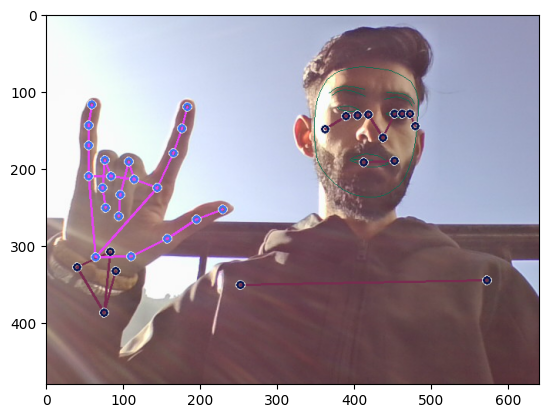

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.right_hand_landmarks.landmark)

21

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
if results.face_landmarks:
    # Extract x, y, z coordinates for all 468 face landmarks (468 * 3 = 1404)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    # If no face landmarks detected, return zero array of same size
    face = np.zeros(1404)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test.shape

(1662,)

In [22]:
result_test

array([ 0.68384928,  0.33523935, -1.19098639, ...,  0.09268808,
        0.24520098, -0.0571046 ])

In [23]:
468*3+33*4+21*3+21*3

1662

In [24]:
np.save('0', result_test)

In [25]:
np.load('0.npy')

array([ 0.68384928,  0.33523935, -1.19098639, ...,  0.09268808,
        0.24520098, -0.0571046 ])

# 4. Setup Folders for Collection

In [26]:
#path for exported data, numpy arrays
DATA_PATH=os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['hello','thanks','iloveyou'])

#30 vid worth of data
no_sequences=30

#vids are going to be 30 frames in length
sequence_length=30

In [27]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [28]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [29]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5,
                          min_tracking_confidence=0.5) as holistic: 
    
    stop_flag = False  # <-- flag to break all loops
    
    for action in actions:
        if stop_flag: break
        for sequence in range(no_sequences):
            if stop_flag: break
            for frame_num in range(sequence_length):

                # read feed
                ret, frame = cap.read()

                # make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)  

                # draw landmarks
                draw_landmarks(image, results)

                # Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, "STARTING COLLECTION", (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image,
                                f"Collecting frames for {action} Video Number {sequence}",
                                (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4,
                                cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,
                                f"Collecting frames for {action} Video Number {sequence}",
                                (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1,
                                cv2.LINE_AA)

                # keypoint extraction
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                         
                # show to screen
                cv2.imshow('OpenCV Feed', image)

                # Break if "x" is pressed
                if cv2.waitKey(10) & 0xFF == ord('x'):
                    stop_flag = True
                    break

cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [29]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [29]:
!pip install tensorflow==2.15.0  scikit-learn 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\PyProject\\signlang\\venv\\Lib\\site-packages\\~=_dtypes\\_ml_dtypes_ext.cp311-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for ml-dtypes~=0.2.0 from https://files.pythonhosted.org/packages/08/89/c727fde1a3d12586e0b8c01abf53754707d76beaa9987640e70807d4545f/ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.4
    Uninstalling ml_dtypes-0.5.4:
      Successfully uninstalled ml_dtypes-0.5.4


In [29]:
#actions = np.array(['hello', 'how','you','fine'])

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(90, 30, 1662)

In [33]:
np.array(labels).shape

(90,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(90, 30, 1662)

In [36]:
!pip uninstall -y jax jaxlib
!pip install --force-reinstall ml_dtypes==0.2.0


Found existing installation: jax 0.7.1
Uninstalling jax-0.7.1:
  Successfully uninstalled jax-0.7.1
Found existing installation: jaxlib 0.7.1
Uninstalling jaxlib-0.7.1:
  Successfully uninstalled jaxlib-0.7.1


ERROR: Exception:
Traceback (most recent call last):
  File "E:\PyProject\signlang\venv\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "E:\PyProject\signlang\venv\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "E:\PyProject\signlang\venv\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "E:\PyProject\signlang\venv\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "E:\PyProject\signlang\venv\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "E:\PyProject\signlang\venv\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "E:\PyProject\signlang\venv\Lib\site-pack

  Obtaining dependency information for ml_dtypes==0.2.0 from https://files.pythonhosted.org/packages/08/89/c727fde1a3d12586e0b8c01abf53754707d76beaa9987640e70807d4545f/ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for numpy>1.20 from https://files.pythonhosted.org/packages/aa/44/9fe81ae1dcc29c531843852e2874080dc441338574ccc4306b39e2ff6e59/numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl (13.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\PyProject\\signlang\\venv\\Lib\\site-packages\\~0mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
!pip uninstall -y jax jaxlib


In [41]:
!pip install --force-reinstall ml_dtypes==0.2.0


  Obtaining dependency information for ml_dtypes==0.2.0 from https://files.pythonhosted.org/packages/08/89/c727fde1a3d12586e0b8c01abf53754707d76beaa9987640e70807d4545f/ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for numpy>1.20 from https://files.pythonhosted.org/packages/aa/44/9fe81ae1dcc29c531843852e2874080dc441338574ccc4306b39e2ff6e59/numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl (13.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtyp

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires jax, which is not installed.
mediapipe 0.10.21 requires jaxlib, which is not installed.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.3.5 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.3.5 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
!pip install --force-reinstall tensorflow==2.15.0


  Obtaining dependency information for tensorflow==2.15.0 from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/8f/aa/ba0014cc4659328dc818a28827be78e6d97312ab0cb98105a770924dc11e/absl_py-2.3.1-py3-none-any.whl.metadata
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dd

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\PyProject\\signlang\\venv\\Lib\\site-packages\\~rapt\\_wrappers.cp311-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
X_train.shape

(85, 30, 1662)

In [41]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [44]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [45]:
res = [.7, 0.2, 0.1]

In [46]:
actions[np.argmax(res)]

'hello'

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


3/3 [==============================] - 7s 127ms/step - loss: 1.1082 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 167ms/step - loss: 4.1778 - categorical_accuracy: 0.3882
Epoch 3/2000
3/3 [==============================] - 0s 151ms/step - loss: 19.9937 - categorical_accuracy: 0.2588
Epoch 4/2000
3/3 [==============================] - 0s 82ms/step - loss: 10.7720 - categorical_accuracy: 0.2471
Epoch 5/2000
3/3 [==============================] - 0s 126ms/step - loss: 33.0193 - categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 151ms/step - loss: 12.3025 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 123ms/step - loss: 13.2585 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 0s 85ms/step - loss: 39.3964 - categorical_accuracy: 0.3529
Epoch 9/2000
3/3 [==============================] - 0s 91ms/step - loss: 86.0456 - categorical_acc

KeyboardInterrupt: 

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

# 8. Make Predictions

In [50]:
res = model.predict(X_test)

1/1 [==============================] - 1s 881ms/step


In [51]:
actions[np.argmax(res[4])]

'hello'

In [52]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [53]:
model.save('action.h5')

E:\PyProject\signlang\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
del model

In [54]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 78ms/step


In [57]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [58]:
ytrue

[0, 2, 2, 1, 2]

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 2],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[2, 0],
        [2, 1]]], dtype=int64)

In [60]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in Real Time

In [73]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
           # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [72]:
cap.release()
cv2.destroyAllWindows()

In [104]:
res[np.argmax(res)] > threshold

True

In [77]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [78]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 41ms/step


array([[0.3489287 , 0.32561532, 0.32545602]], dtype=float32)